# Light GBM

Light GBM, XGBoost'un eğitim süresi performasını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. (2017, Microsoft)

- Daha performanslı

- Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi

- Breadth-first search(BFS) yerine depth-first search(DFS)

----

# 1. Model (Light GBM)

In [1]:
!pip install lightgbm

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")

df = hit.copy()

df = df.dropna()

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [5]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [6]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [7]:
y = df["Salary"]

y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
lgbm_model = LGBMRegressor()

lgbm_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

----------

# 2. Tahmin (Light GBM)

In [10]:
lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)

array([ 747.27577776,  696.56496327, 1374.39525293,  226.10183768,
        490.34818367,  336.64087163,  244.51392282,  111.26504013,
        926.39143875,  480.69726555,  833.68715554,  959.11510008,
        561.11059387,   11.044985  ,  316.43085159, 1046.63003696,
        949.81852398,  139.07151089,  887.86456737,  332.24159329,
        271.41232292,  966.21414836,  665.68774684,  578.30645351,
        539.6540439 ,  120.75243756,  666.04756043,  383.95478905,
        790.34162095,  157.0221543 ,  240.28312963,  195.28663262,
        592.38126362,  133.14658422,  277.19753471, 1256.0788298 ,
       1238.8345811 ,  128.39790305,  175.1571059 ,  521.09030024,
         91.04120916,   44.38359303,  624.31868447,  690.83444014,
       1237.69044786,  628.63742068,  589.04666178,   -8.51229917,
        146.76683487,  880.37654108,  615.08333567,  398.61718452,
        781.64995162,  166.78918003,   69.23084248,  892.75436957,
        671.1786227 ,  676.08054412,  229.40176823, 1238.83458

In [11]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)

np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

--------

# 3. Model Doğrulama / Model Tuning (Light GBM)

In [12]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
lgbm_grid = {"learning_rate" : [0.01, 0.1, 0.5, 1],
            "n_estimators" : [20, 40, 100, 200, 500, 1000],
            "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8],
            "colsample_bythree" : [0.4, 0.5, 0.6, 0.9, 1]}

In [16]:
lgbm_model = LGBMRegressor()

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_grid, cv = 10, n_jobs = -1, verbose = 2)

lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 2768 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 4228 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 6008 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8116 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bythree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth':

In [17]:
lgbm_cv_model.best_params_

{'colsample_bythree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [19]:
lgbm_tuned = LGBMRegressor(colsample_bythree = 0.4, learning_rate = 0.1, max_depth = 6, n_estimators = 20)

lgbm_tuned.fit(X_train, y_train)

y_pred = lgbm_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

In [20]:
lgbm_tuned.feature_importances_

array([ 6,  6,  0,  2,  6, 10, 13, 10, 11,  5, 10, 22,  9, 18,  2,  4,  4,
        0,  0])

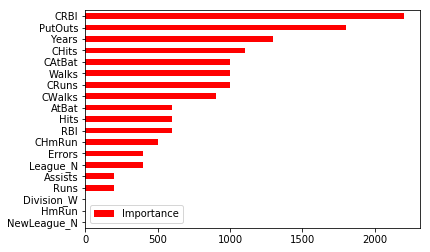

In [30]:
Importance = pd.DataFrame({"Importance" : lgbm_tuned.feature_importances_ * 100}, index = X_train.columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "red");

-------